# Real-ESRGAN 4x Image Upscale Example

* Paper: [(Real-ESRGAN: Training Real-World Blind Super-Resolution with Pure Synthetic Data)](https://arxiv.org/abs/2107.10833)

## Installs

In [4]:
!pip install git+https://github.com/sberbank-ai/Real-ESRGAN.git

  Cloning https://github.com/sberbank-ai/Real-ESRGAN.git to /tmp/pip-req-build-b1lzw2_g
  Running command git clone --filter=blob:none --quiet https://github.com/sberbank-ai/Real-ESRGAN.git /tmp/pip-req-build-b1lzw2_g
  Resolved https://github.com/sberbank-ai/Real-ESRGAN.git to commit 362a0316878f41dbdfbb23657b450c3353de5acf
  Preparing metadata (setup.py) ... done
  Created wheel for RealESRGAN: filename=RealESRGAN-1.0-py3-none-any.whl size=9107 sha256=e2b0e4ed72bdb217c447ae21f60d84dc723e8601eb7cf223b3640e986dcb955d
  Stored in directory: /tmp/pip-ephem-wheel-cache-jt5vh_k9/wheels/91/40/63/13fbbf71a56f91ddc8c23df0d1ba9e695c66661b435c3a494f
Successfully built RealESRGAN
  Attempting uninstall: RealESRGAN
    Found existing installation: realesrgan 0.3.0
    Uninstalling realesrgan-0.3.0:
      Successfully uninstalled realesrgan-0.3.0


## Imports

In [9]:
import torch
from PIL import Image
import numpy as np
from RealESRGAN import RealESRGAN
import matplotlib.pyplot as plt

## Load Model and image

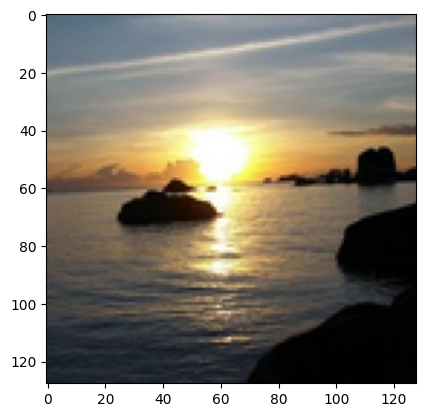

In [38]:
# set device to cuda if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# load models and weights
model = RealESRGAN(device, scale=4)
model.load_weights('weights/RealESRGAN_x4.pth', download=True)

# set original image
orig = 'sunset128x128.png'
orig_image = Image.open(orig).convert('RGB')

plt.imshow(orig_image)

## Upscale Image

CPU times: user 597 ms, sys: 389 ms, total: 986 ms
Wall time: 967 ms


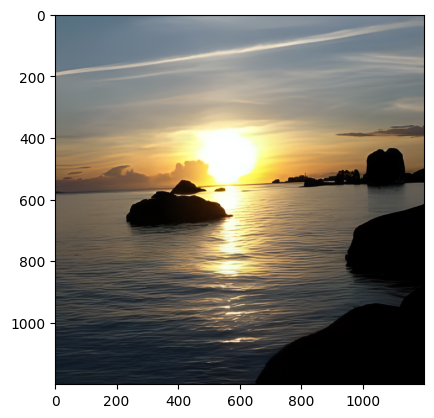

In [39]:
%%time
# run model on image
upsc_image = model.predict(orig_image)

# save to disk
save_name = f'{image_name}_4x_upscale.png'
upsc_image.save(save_name)

# plot results
plt.imshow(sr_image)

## Zoom detail

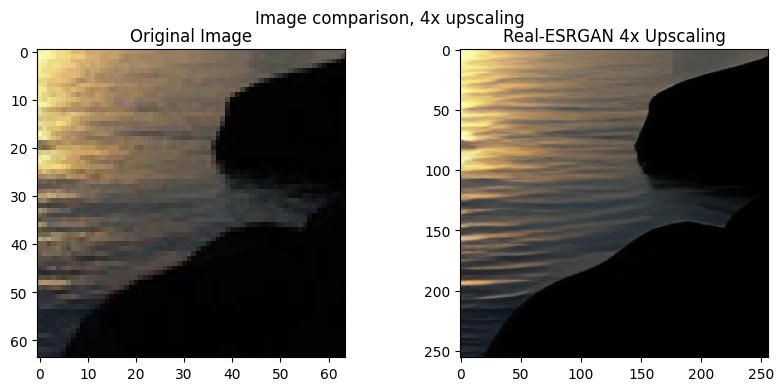

In [41]:
start,end = 64,128
orig_zoom = np.asarray(orig_image)[start:end,start:end]
upsc_zoom = np.asarray(upsc_image)[4*start:4*end,4*start:4*end]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(orig_zoom)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(upsc_zoom)
plt.title('Real-ESRGAN 4x Upscaling')
plt.suptitle('Image comparison, 4x upscaling')
plt.show()

In [36]:
#new_img = orig_image.resize((128,128), Image.Resampling.LANCZOS)
#new_img.save('sunset128x128.png')
#plt.imshow(new_img)